<a href="https://colab.research.google.com/github/Leelddd/deep-tragedy/blob/master/dlwp/3_5_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 Classifying newswires: a multiclass classification example

## 3.5.1 The Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data), len(test_data)

(8982, 2246)

In [5]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [6]:
word_index=reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [24]:
from itertools import islice

def show_dic(dic, n):
    return list(islice(dic.items(),n))

show_dic(word_index, 5)

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796)]

In [10]:
[key+':'+str(value) for (_, (key, value)) in zip(range(10), word_index.items())]

['mdbl:10996',
 'fawc:16260',
 'degussa:12089',
 'woods:8803',
 'hanging:13796',
 'localized:20672',
 'sation:20673',
 'chanthaburi:20675',
 'refunding:10997',
 'hermann:8804']

In [0]:
reverse_word_index = {value:key for key,value in word_index.items()}

In [25]:
show_dic(reverse_word_index, 5)

[(10996, 'mdbl'),
 (16260, 'fawc'),
 (12089, 'degussa'),
 (8803, 'woods'),
 (13796, 'hanging')]

## 3.5.2 Preparing the data

In [0]:
import numpy as np

def vectorize_seq(seqs, dim=10000):
    result = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        result[i, seq] = 1
    return result

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [0]:
def onehot(labels, dim=46):
    result = np.zeros((len(labels), 46))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result
y_train = onehot(train_labels)
y_test = onehot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
y_train = onehot(train_labels)
y_test = onehot(test_labels)

## 3.5.3 Building your network

In [0]:
from keras import models
from keras import layers

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3.5.4 Validating your approach

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 156us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4581 - a

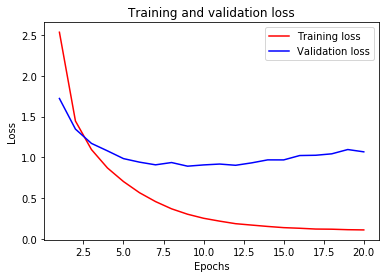

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

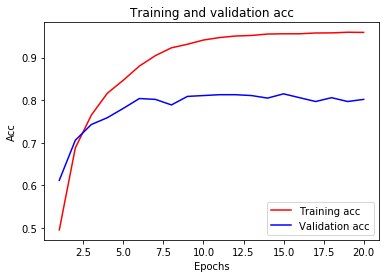

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [41]:
results

[1.022207990036622, 0.7756010686194165]

## 3.5.5 Generating predictions on new data

In [0]:
predictions = model.predict(x_test)

In [44]:
np.sum(predictions[0])

1.0

In [46]:
np.argmax(predictions[0])

3

## 3.4.6 A different way to handle the labels and the loss

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [0]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [64]:
len(y_val), len(x_val), len(partial_x_train), len(partial_y_train)

(1000, 1000, 7982, 7982)

In [66]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.1301 - acc: 0.9562 - val_loss: 1.0631 - val_acc: 0.7950
Epoch 2/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.1256 - acc: 0.9573 - val_loss: 0.9874 - val_acc: 0.8170
Epoch 3/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.1184 - acc: 0.9569 - val_loss: 1.1127 - val_acc: 0.7890
Epoch 4/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.1161 - acc: 0.9577 - val_loss: 1.0291 - val_acc: 0.8140
Epoch 5/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.1105 - acc: 0.9567 - val_loss: 1.0875 - val_acc: 0.8090
Epoch 6/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.1082 - acc: 0.9580 - val_loss: 1.0883 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.1090 - acc: 0.9573 - val_loss: 1.1512 - val_acc: 0.7880
Epoch 8

In [67]:
results

[1.245490361831067, 0.7880676759212865]